### Example classification using fastai

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (4.5, 3.)
matplotlib.rcParams['figure.figsize']

[4.5, 3.0]

In [2]:
import fastai
from torchvision import datasets, models, transforms
from fastai.vision import ImageDataBunch, imagenet_stats, get_transforms, get_image_files, accuracy, cnn_learner, ClassificationInterpretation
import seaborn as sns

In [3]:
datadir = 'data/'

In [4]:
fnames = get_image_files(datadir)

In [5]:
pat = r'/(\d+)CAG_Control_im_\d+.tif$'

In [6]:
data = ImageDataBunch.from_name_re(datadir, fnames, pat, valid_pct=0.3, bs=4, ds_tfms=get_transforms(),
                                  ).normalize(imagenet_stats)

In [7]:
data.classes

['20', '56']

In [8]:
data

ImageDataBunch;

Train: LabelList (86 items)
x: ImageList
Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190)
y: CategoryList
56,56,20,20,20
Path: data;

Valid: LabelList (36 items)
x: ImageList
Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190),Image (3, 190, 190)
y: CategoryList
56,56,20,20,20
Path: data;

Test: None

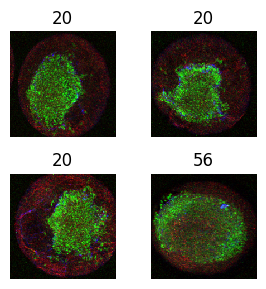

In [8]:
data.show_batch(rows=2,figsize=(3,3))

In [18]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.541367,0.385326,0.888889,00:11
1,0.469993,0.474057,0.750000,00:11
2,0.410576,0.259820,0.916667,00:11
3,0.391285,0.356019,0.805556,00:11


In [14]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.071919,0.160524,0.916667,00:15
1,0.201671,0.150242,0.944444,00:15


In [33]:
interp = ClassificationInterpretation.from_learner(learn)

In [40]:
df_valid = pd.DataFrame(data=[interp.preds.numpy()[:,0], [data.classes[i1] for i1 in interp.y_true.numpy()]]).transpose()
df_valid.columns = ['p20', 'class']

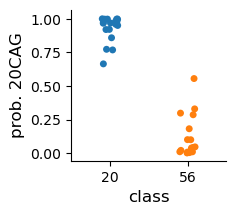

In [48]:
fig,ax=plt.subplots(figsize=(2,2))
sns.stripplot(x='class', y='p20', data=df_valid, ax=ax);
sns.despine()
ax.set_ylabel('prob. 20CAG');